# Proyecto Final Deep Learning
## Sistema de recomendación  a base de entrenamiento de Redes Convolucionales
### Karla Andrea Palma Villanueva - A01754270

In [1]:
import tkinter as tk
from tkinter import Label
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Planteamiento del problema
* Para este proyecto, se seleccionó el problema de clasificación de imágenes de ropa utilizando el dataset Fashion MNIST, el cual contiene 70,000 imágenes en 10 categorías diferentes.
* El objetivo de este proyecto es ayudar a los usuarios a combinar prendas de ropa para estilizar sus outfits, utilizando técnicas de deep learning, 2ue ayudan a clasificar imágenes de ropa y proporcionar recomendaciones de combinaciones basadas en las predicciones del modelo.



# Data exploring

* Carga de datos: Se cargan los datos del conjunto Fashion MNIST, que contiene imágenes de ropa clasificadas en 10 categorías.
* Definición de clases: Se definen los nombres de las clases para facilitar la interpretación de las etiquetas.
* Visualización: Se muestran algunas imágenes del conjunto de entrenamiento para tener una idea de los datos con los que se trabajará

In [3]:
# Cargar datos de Fashion MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
fashion_mnist = tf.keras.datasets.fashion_mnist


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

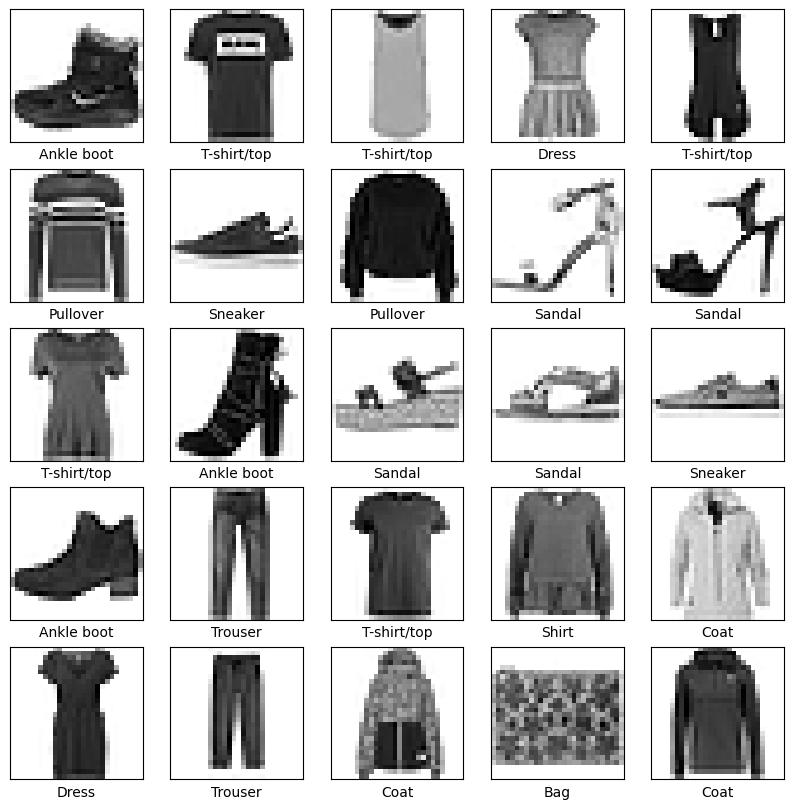

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

La gráfica muestra una cuadrícula de 5x5 con imágenes de diferentes prendas de ropa. Cada imagen está etiquetada con su correspondiente clase, como 'T-shirt/top', 'Trouser', etc. Esto ayuda a visualizar la diversidad de las imágenes en el conjunto de datos y a verificar que las etiquetas sean correctas

# Data Processing

* Normalización: Las imágenes se normalizan para que los valores de los píxeles estén en el rango [0, 1], lo cual es importante para el entrenamiento del modelo de deep learning.

In [6]:
# Normalización
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

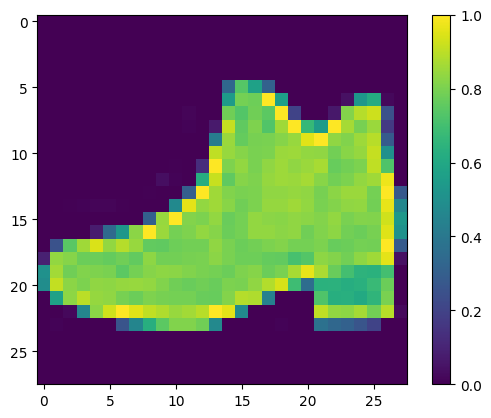

In [7]:
plt.figure()
plt.imshow(X_train[15])
plt.colorbar()
plt.grid(False)
plt.show()

La gráfica muestra una imagen normalizada de una prenda de ropa con una barra de color a la derecha que indica la escala de valores de los píxeles. La normalización es crucial para asegurar que el modelo de deep learning procese las imágenes de manera eficiente y efectiva.

# CNN arquitecture

Se implementó una red neuronal convolucional (CNN) para clasificar las imágenes
* Arquitectura: Se define una red neuronal convolucional (CNN) con varias capas convolucionales, de pooling y densas.
* Compilación: El modelo se compila con el optimizador Adam y la función de pérdida sparse_categorical_crossentropy.
* Resumen: Se muestra un resumen de la arquitectura del modelo para revisar las capas y los parámetros.

In [8]:
# Definición de la arquitectura de la CNN
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    
    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Tercera capa convolucional
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    
    # Capa totalmente conectada
    layers.Dense(64, activation='relu'),
    
    # Capa de salida para clasificación
    layers.Dense(10, activation='softmax')
])



c:\Users\Karla Palma\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

# Training model

Una vez definida la arquitectura del modelo, se procede a entrenarlo y analizar los resultados en los conjuntos de pruebas y validación.
* Entrenamiento: El modelo se entrena durante 10 épocas utilizando los datos de entrenamiento y validación.
* Visualización: Se grafican las curvas de precisión del entrenamiento y la validación para evaluar el rendimiento del modelo.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7413 - loss: 0.7021 - val_accuracy: 0.8674 - val_loss: 0.3724
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8822 - loss: 0.3223 - val_accuracy: 0.8919 - val_loss: 0.3057
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8992 - loss: 0.2740 - val_accuracy: 0.8977 - val_loss: 0.2862
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9141 - loss: 0.2366 - val_accuracy: 0.9009 - val_loss: 0.2762
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9182 - loss: 0.2207 - val_accuracy: 0.9006 - val_loss: 0.2770
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9278 - loss: 0.1956 - val_accuracy: 0.9004 - val_loss: 0.2743
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9339 - loss: 0.1763 - val_accuracy: 0.8954 - val_loss: 0.2882
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9395 - loss: 0

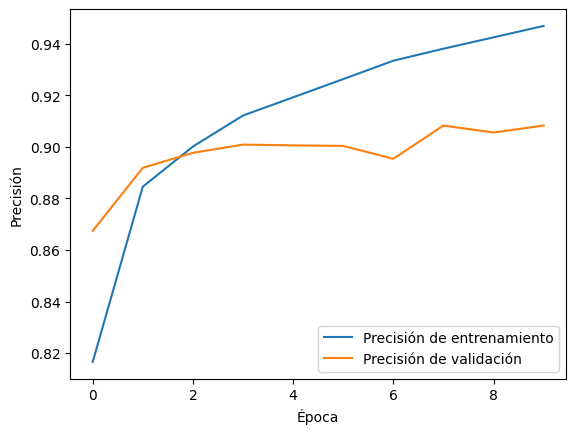

In [10]:
# Entrenamiento de la CNN
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

# Visualización del entrenamiento y precisión
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.show()

### Interpretación de la Gráfica:

La gráfica muestra la precisión del modelo tanto en el conjunto de entrenamiento como en el de validación a lo largo de las épocas. Se puede observar cómo la precisión mejora con cada época, indicando que el modelo está aprendiendo. La diferencia entre las curvas de entrenamiento y validación puede dar una idea sobre el sobreajuste.

# Regularization and Tuning of Hyperparameters

Para mejorar el rendimiento del modelo, se implementan técnicas de regularización y se ajustan los hiperparámetros
* Early Stopping: Se implementa la técnica de early_stopping para detener el entrenamiento cuando la pérdida de validación no mejora después de 3 épocas.

In [11]:
#Entrenamiento con early_stopping
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9632 - loss: 0.1013 - val_accuracy: 0.9081 - val_loss: 0.3004
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9653 - loss: 0.0913 - val_accuracy: 0.9077 - val_loss: 0.3078
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9683 - loss: 0.0847 - val_accuracy: 0.9090 - val_loss: 0.3222
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9716 - loss: 0.0771 - val_accuracy: 0.9127 - val_loss: 0.3292


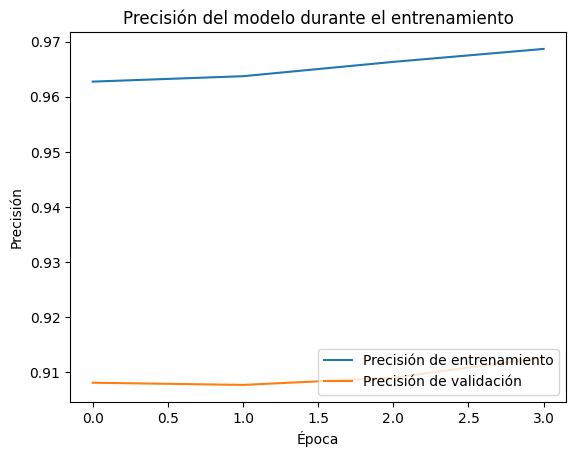

In [12]:
 #Visualizamos la precisión del entrenamiento y la precisión de validación en cada época.

plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend(loc='lower right')
plt.title('Precisión del modelo durante el entrenamiento')
plt.show()

### Interpretación de la Gráfica:

La gráfica muestra la precisión del modelo durante el entrenamiento con early_stopping. Se puede observar que la precisión de validación se estabiliza, lo que indica que el modelo ha alcanzado su mejor rendimiento y evita el sobreajuste.

# Sistema de recomendación

Para proporcionar recomendaciones de combinaciones de prendas, se desarrolla un sistema de recomendación basado en las predicciones del modelo.
* Reglas de combinación: Se definen reglas para combinar diferentes prendas.
* Función de recomendación: Se genera una recomendación de combinaciones basadas en la prenda seleccionada.
* Interacción con el usuario: Se permite al usuario seleccionar prendas y recibir recomendaciones de combinaciones.

In [13]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [14]:
# Definición de combinaciones posibles
combination_rules = {
    'T-shirt/top': ['Trouser', 'Ankle boot'],
    'Trouser': ['T-shirt/top', 'Shirt'],
    'Pullover': ['Trouser', 'Sneaker'],
    'Dress': ['Coat', 'Sandal'],
    'Coat': ['Dress', 'Sneaker'],
    'Sandal': ['Dress', 'Bag'],
    'Shirt': ['Trouser', 'Ankle boot'],
    'Sneaker': ['T-shirt/top', 'Trouser'],
    'Bag': ['Dress', 'Coat'],
    'Ankle boot': ['T-shirt/top', 'Trouser']
}

In [15]:
def recommend_combinations(item, image):
    """Genera recomendaciones y muestra la prenda seleccionada con sus combinaciones."""
    recommendations = combination_rules.get(item, [])
    print(f"\nHas elegido la prenda: {item}")
    plt.imshow(image, cmap=plt.cm.binary)
    plt.title(f"Prenda seleccionada: {item}")
    plt.axis('off')
    plt.show()
    
    print("Recomendaciones de combinación:")
    for recommendation in recommendations:
        print(f"- {recommendation}")



In [16]:
def select_and_recommend():
    """Permite al usuario seleccionar prendas repetidamente o finalizar el proceso."""
    while True:
        print("\nSeleccione una prenda de la lista:")
        for idx, name in enumerate(class_names, start=1):
            print(f"{idx}. {name}")
        
        try:
            user_choice = int(input("Ingrese el número correspondiente a la prenda: "))
            if 1 <= user_choice <= len(class_names):
                item = class_names[user_choice - 1]
                
                # Filtrar una imagen del conjunto de entrenamiento que corresponda a la prenda seleccionada
                image_index = np.where(y_train == (user_choice - 1))[0][0]  # Obtiene el primer índice de esa prenda
                image = X_train[image_index]  # Obtiene la imagen correspondiente
                
                recommend_combinations(item, image)
            else:
                print("Por favor, ingrese un número válido entre 1 y 10.")
        except ValueError:
            print("Entrada inválida. Por favor, ingrese un número.")
        
        # Preguntar al usuario si desea continuar
        continuar = input("\n¿Desea elegir otra prenda? (s/n): ").strip().lower()
        if continuar != 's':
            print("Gracias por usar el sistema de recomendaciones. ¡Hasta luego!")
            break


Seleccione una prenda de la lista:
1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot

Has elegido la prenda: Trouser


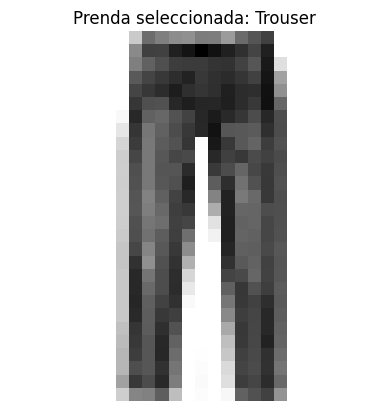

Recomendaciones de combinación:
- T-shirt/top
- Shirt
Gracias por usar el sistema de recomendaciones. ¡Hasta luego!


In [17]:
# Ejemplo de uso
select_and_recommend()

In [18]:
model.save("modelo_fashion_mnist.h5")


# Creación de interfaz

Se permite al usuario seleccionar prendas y recibir recomendaciones de combinaciones

In [19]:
import tkinter as tk
from tkinter import messagebox, Label, Listbox, Button
from PIL import Image, ImageTk
import numpy as np
import tensorflow as tf

# Cargar el modelo entrenado
model = tf.keras.models.load_model("modelo_fashion_mnist.h5")
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Cargar el dataset de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(_, _), (test_images, test_labels) = fashion_mnist.load_data()  # También cargamos las etiquetas de prueba

# Crear la ventana principal
window = tk.Tk()
window.title("Recomendador de Combinaciones de Ropa")
window.geometry("400x600")

# Etiqueta para la imagen cargada
label_image = Label(window)
label_image.pack()

# Etiqueta para la predicción
label_result = tk.Label(window, text="", font=("Helvetica", 16))
label_result.pack()

# Etiqueta para la combinación sugerida
label_combination = tk.Label(window, text="", font=("Helvetica", 14))
label_combination.pack()

# Variable para controlar el ciclo
continue_process = True

# Función para mostrar la imagen seleccionada
def show_selected_image():
    global continue_process
    if not continue_process:
        return
    
    # Obtener el índice seleccionado
    selected_index = int(listbox.curselection()[0])
    img = test_images[selected_index]

    # Mostrar la imagen en la interfaz
    img_pil = Image.fromarray(img).resize((200, 200))
    img_tk = ImageTk.PhotoImage(img_pil)
    label_image.config(image=img_tk)
    label_image.image = img_tk

    # Preprocesar la imagen para la predicción
    img_array = img / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)  # Formato (1, 28, 28, 1)

    # Realizar la predicción
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    label_result.config(text=f"Predicción: {class_names[predicted_class]}")

    # Sugerir combinaciones
    suggest_combination(predicted_class)

    # Preguntar al usuario si desea continuar
    ask_continue()

# Función para sugerir combinaciones de ropa
def suggest_combination(pred_class):
    combinations = {
        'T-shirt/top': 'Jeans o falda casual',
        'Trouser': 'Camisa casual o formal',
        'Pullover': 'Pantalón de vestir o jeans',
        'Dress': 'Chaqueta ligera y zapatos formales',
        'Coat': 'Ropa de invierno: pantalones y botas',
        'Sandal': 'Shorts y camiseta sin mangas',
        'Shirt': 'Pantalones o jeans casuales',
        'Sneaker': 'Ropa deportiva o casual',
        'Bag': 'Combinación libre, accesorio adicional',
        'Ankle boot': 'Jeans o falda, con abrigo o suéter'
    }
    suggestion = combinations.get(class_names[pred_class], "Sin combinación sugerida")
    label_combination.config(text=f"Combinación sugerida: {suggestion}")

# Función para preguntar si el usuario quiere continuar
def ask_continue():
    global continue_process
    response = messagebox.askyesno("Continuar", "¿Desea elegir otra prenda?")
    if not response:
        continue_process = False
        window.destroy()

# Función para cerrar la aplicación desde el botón de salida
def exit_application():
    global continue_process
    continue_process = False
    window.destroy()

# Crear una lista para seleccionar imágenes del dataset, pero mostrar nombres de las clases
listbox = Listbox(window)
for i in range(len(test_images)):
    # Mostrar el nombre de la clase real como referencia
    listbox.insert(tk.END, f"{i + 1}: {class_names[test_labels[i]]}")
listbox.pack(pady=20)

# Configurar el evento de selección en el Listbox
listbox.bind("<<ListboxSelect>>", lambda e: show_selected_image())

# Botón para salir de la aplicación
exit_button = Button(window, text="Finalizar sistema", command=exit_application, font=("Helvetica", 14), bg="red", fg="white")
exit_button.pack(pady=10)

# Ejecutar la interfaz
window.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


# Conclusiones 
El proyecto de clasificación y recomendación de prendas de ropa ha demostrado ser exitoso en cumplir su objetivo principal de ayudar a los usuarios a combinar prendas para estilizar sus outfits; puesto que se implementó una red neuronal convolucional (CNN) que logró clasificar imágenes de ropa en 10 categorías diferentes con alta precisión del dataset de Fashion MNIST. La normalización de las imágenes y la definición de una arquitectura adecuada fueron pasos cruciales para el rendimiento del modelo; además, la implementación de técnicas de regularización, como el early_stopping, y el ajuste de hiperparámetros mejoraron significativamente los resultados, evitando el sobreajuste y optimizando el rendimiento del modelo.

La importancia de implementar técnicas de deep learning en la resolución de problemas radica en su capacidad para manejar grandes volúmenes de datos y extraer patrones complejos que no son fácilmente identificables mediante métodos tradicionales. En este proyecto, el uso de deep learning permitió desarrollar un sistema de recomendación que no solo clasifica las prendas, sino que también sugiere combinaciones estilizadas, añadiendo un valor significativo para los usuarios. El código desarrollado puede ser adaptado para otros conjuntos de datos con estructuras similares, lo que lo hace versátil y aplicable a una amplia gama de problemas de clasificación de imágenes.

Además de la moda, hay muchas otras aplicaciones que podrían beneficiarse del uso de modelos de clasificación y recomendación, debido a que tienen un potencial enorme para transformar diversas industrias al proporcionar soluciones precisas y personalizadas basadas en el análisis de datos complejos.